In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
ad = pd.DataFrame(pd.read_csv("advertising.csv"))
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
ad.shape

(200, 4)

In [4]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


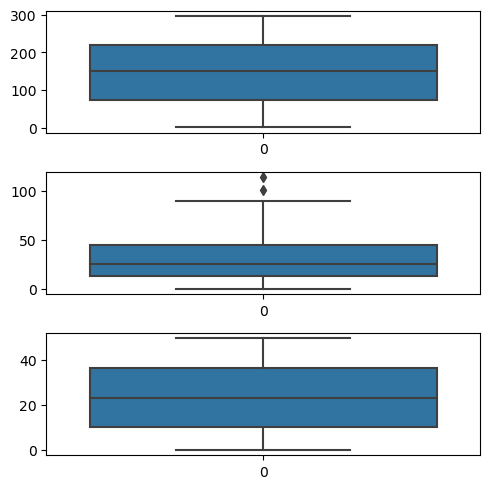

In [6]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(ad['TV'], ax = axs[0])
plt2 = sns.boxplot(ad['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(ad['Radio'], ax = axs[2])
plt.tight_layout()

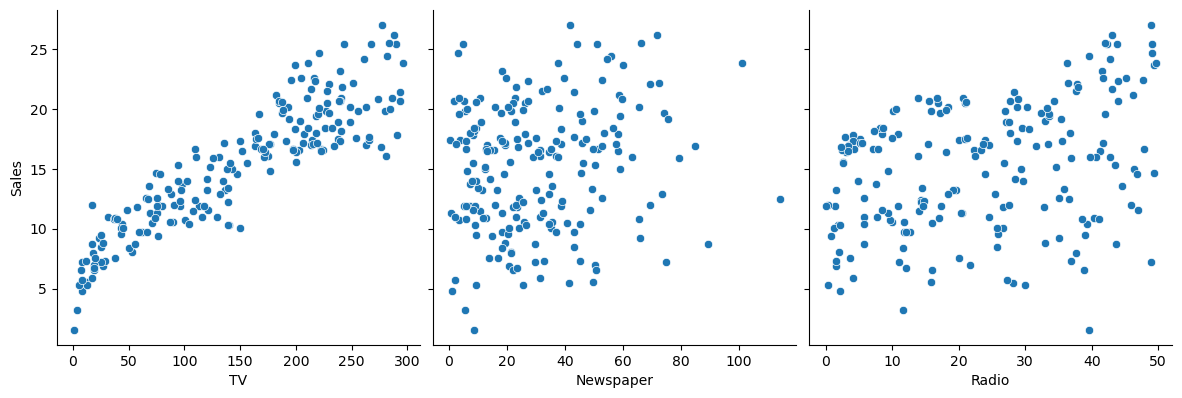

In [7]:
sns.pairplot(ad, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

# 1. A program for linear regression model using ML 

In [8]:
x= ad.iloc[:, 0:1].values  
y= ad.iloc[:, -1:].values   

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 0)

In [10]:
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(X_train, y_train)  

LinearRegression()

In [11]:
y_pred= regressor.predict(X_test)  
x_pred= regressor.predict(X_train)  

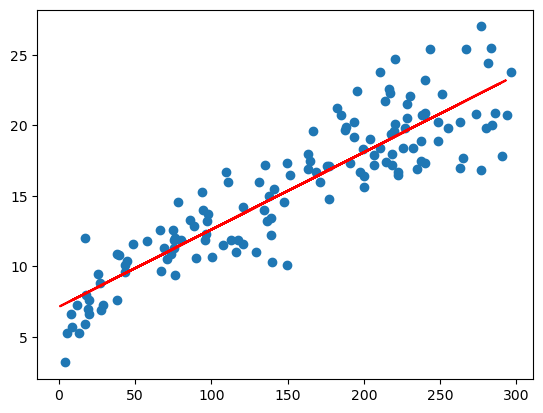

In [12]:
plt.scatter(X_train, y_train)   
plt.plot(X_test, y_pred, color="red")    
plt.show()   

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = r2_score(y_test, y_pred)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

model_evaluation(regressor, X_test, y_test, 'Linear Reg.')

,Linear Reg.
MAE,1.863944
MSE,5.569539
RMSE,2.359987
R2-Score,0.815017


# 2. A program for linear regression model using scikit-learn but no machine learning

In [14]:
X = ad['TV']
y = ad['Sales']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [16]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [17]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [18]:
import statsmodels.api as sm

In [19]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()

In [20]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [21]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           1.52e-52
Time:                        03:11:31   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

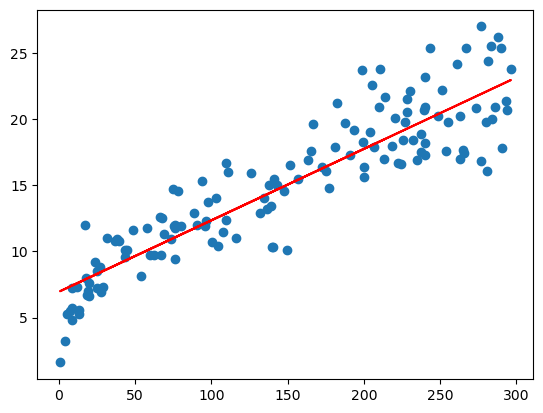

In [22]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [23]:
X_test_sm = sm.add_constant(X_test)

y_pred = lr.predict(X_test_sm)

In [24]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [26]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966233

In [27]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7921031601245658

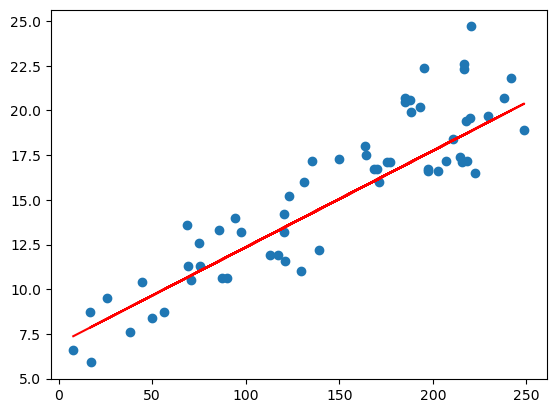

In [28]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

# 3. A program without using scikit-learn or machine learning for Linear regression (using Gradient Descent)

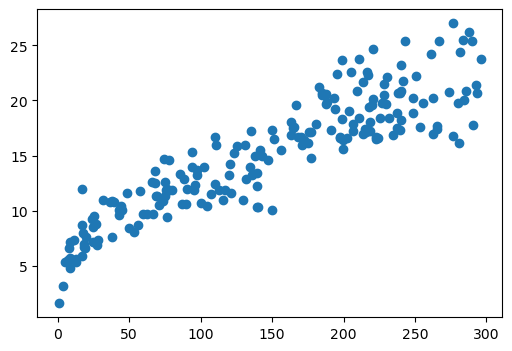

In [29]:
plt.rcParams['figure.figsize'] = (6.0, 4.0)
X = ad.iloc[:, 0]
Y = ad.iloc[:, -1]
plt.scatter(X, Y)
plt.show()


In [30]:
# Building the model
m = 0
c = 0

L = 0.00001  # The learning Rate
# epochs = 1000000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

0.05568825156089611 6.930814002735892


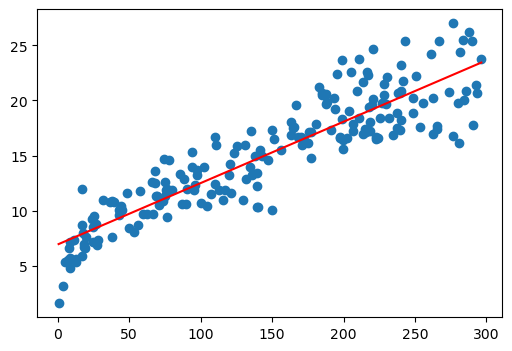

In [31]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

In [32]:
r_squared = r2_score(Y, Y_pred)
r_squared

0.8121580452141661

In [37]:
mse=np.sqrt(mean_squared_error(Y, Y_pred))
mse

2.284345514503792